In [1]:
import pandas as pd

df = pd.read_csv('../../data/data.csv')

print(f"Total Rows: {len(df)}")

print(f"Column Names: {df.columns}")

df.head(3)

Total Rows: 188378
Column Names: Index(['conversation_id', 'message', 'sentiment'], dtype='object')


,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpful...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188378 entries, 0 to 188377
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   conversation_id  188378 non-null  int64 
 1   message          188373 non-null  object
 2   sentiment        188378 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [3]:
rows_with_nulls = df[df.isnull().any(axis=1)]
print(f"No of nulls messages: {len(rows_with_nulls)}")
rows_with_nulls

No of nulls messages: 5


,conversation_id,message,sentiment
20124,923,NaN,Disgusted
28552,1306,NaN,Happy
31504,1442,NaN,Surprised
83361,3815,NaN,Curious to dive deeper
95303,4361,NaN,Happy


## **Dropping NaN rows below** ##

- NULL messages cannot be classified with sentiment as there is nothing to classify with
- Only 5 rows were dropped, not much loss in data information

In [4]:
df = df.dropna()
df.isnull().sum()

conversation_id    0
message            0
sentiment          0
dtype: int64

### **Dropping duplicates** ###

In [5]:
df.drop_duplicates(inplace=True)

## **Sentiments Ground Truth Label Distribution (EDA)** ##

In [6]:
sentiment_counts = df.sentiment.value_counts().reset_index()
sentiment_counts

,sentiment,count
0,Curious to dive deeper,80882
1,Neutral,41358
2,Surprised,30634
3,Happy,29601
4,Sad,2533
5,Disgusted,1432
6,Fearful,1026
7,Angry,876


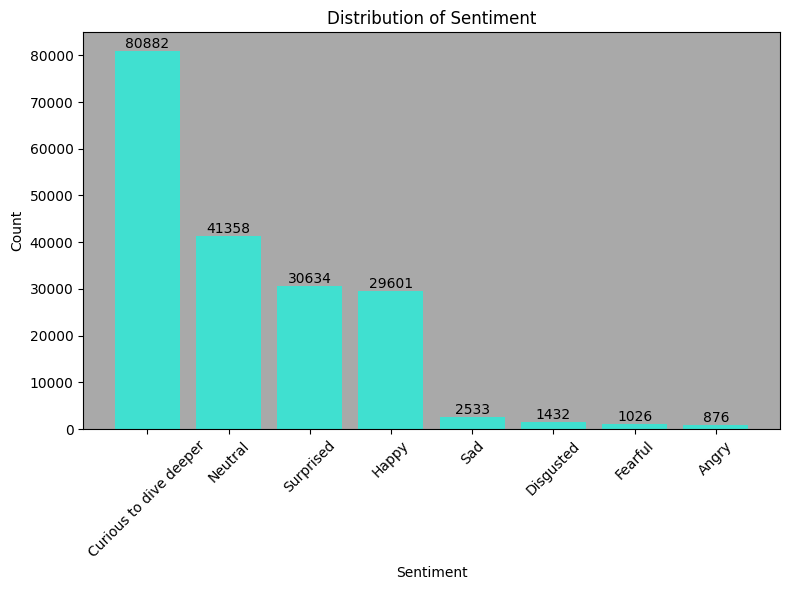

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts['sentiment'], sentiment_counts['count'], color='turquoise')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

for i, count in enumerate(sentiment_counts['count']):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.gca().set_facecolor('darkgrey')
plt.show()


/var/folders/9p/y3gxgvlj5p79ygf8zttgtssw0000gn/T/ipykernel_5015/4146985837.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(frac=sample_fraction))
/var/folders/9p/y3gxgvlj5p79ygf8zttgtssw0000gn/T/ipykernel_5015/4146985837.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/9p/y3gxgvlj5p79ygf8zttgtssw0000gn/T/ipykernel_5015/4146985837.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

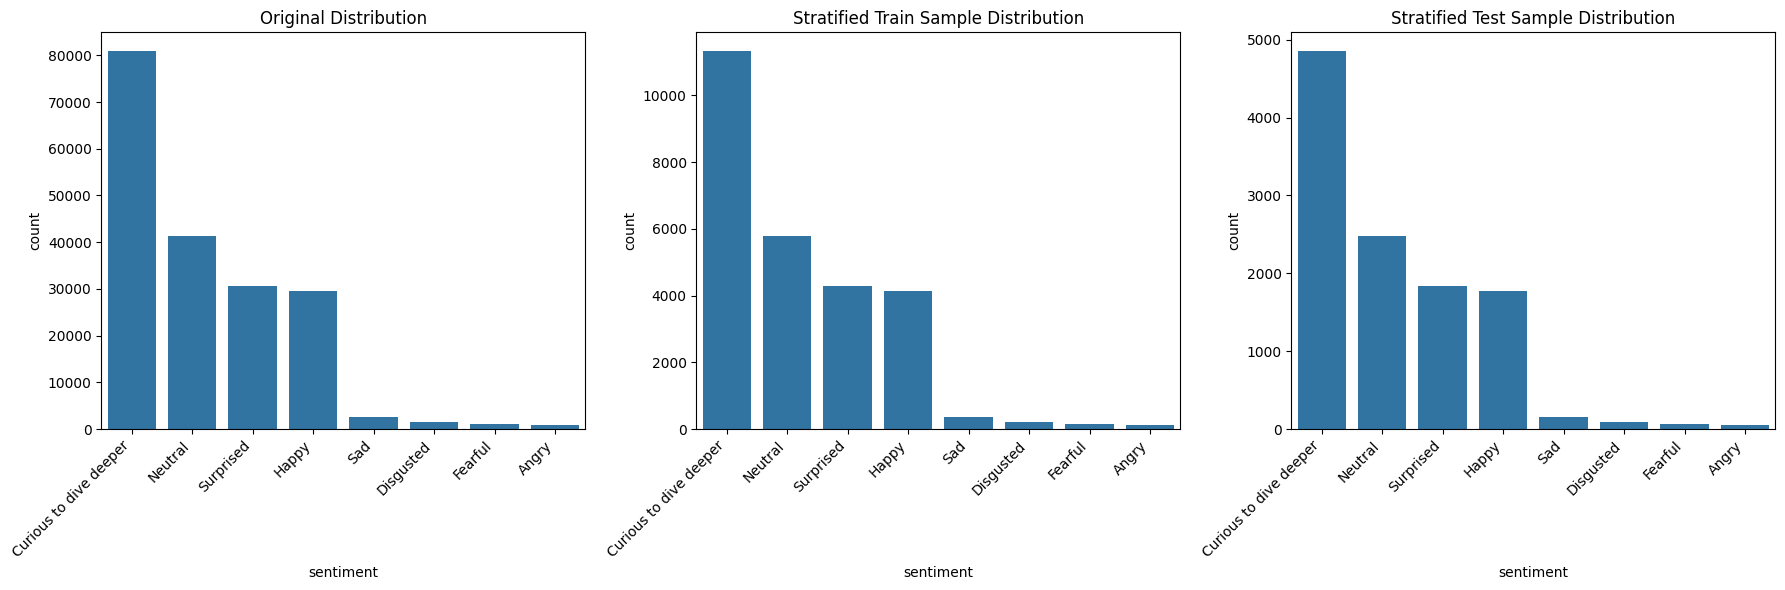

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
from typing import Tuple

def clean_data(file: Path) -> pd.DataFrame:
    """
        Drop 5 rows with missing messages.
    """
    data = pd.read_csv(file)
    data.dropna(inplace=True)
    return data

def sample_data(df: pd.DataFrame, sample_fraction: float = 0.2) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
        Perform stratified sampling on the data.
        Returns a tuple of train and test dataframes.
    """
    stratified_sample = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(frac=sample_fraction))
    train_df, test_df = train_test_split(stratified_sample, test_size=0.3, stratify=stratified_sample['sentiment'])
    return (train_df, test_df)

def plot_sentiment_distribution(ori: pd.DataFrame, train_df: pd.DataFrame, test_df: pd.DataFrame):
    """
        Plot the distribution of sentiment in the dataset.
        Save the train and test dataframes to csv.
    """

    order = ori['sentiment'].value_counts().index

    _, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.countplot(x='sentiment', data=ori, ax=axes[0], order=order).set_title('Original Distribution')
    sns.countplot(x='sentiment', data=train_df, ax=axes[1], order=order).set_title('Stratified Train Sample Distribution')
    sns.countplot(x='sentiment', data=test_df, ax=axes[2], order=order).set_title('Stratified Test Sample Distribution')

    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    train_df.to_csv('../../data/train.csv', index=False)
    test_df.to_csv('../../data/test.csv', index=False)

def main(file: Path) -> None:
    data = clean_data(file=file)
    train_df, test_df = sample_data(data, sample_fraction=0.2)
    plot_sentiment_distribution(data, train_df, test_df)

if __name__ == '__main__':
    file = Path('../../data/data.csv')

    main(file)


    